In [2]:
!pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 5.9 MB/s eta 0:00:00
  Using cached Pillow-9.4.0-cp39-cp39-win_amd64.whl (2.5 MB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached kiwisolver-1.4.4-cp39-cp39-win_amd64.whl (55 kB)
     -------------------------------------- 160.2/160.2 kB 4.8 MB/s eta 0:00:00


In [3]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np

In [4]:
Image_Size = 256
Batch_Size = 64
Channels = 3
N_classes = 4

In [5]:
Dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'Apple Leaves/',
    shuffle = True,
    image_size = (Image_Size , Image_Size),
    batch_size = Batch_Size
)

Found 3642 files belonging to 4 classes.


In [6]:
# Test_Data = tf.keras.preprocessing.image_dataset_from_directory(
#     'Test Data/',
#     shuffle = True,
#     image_size = (Image_Size , Image_Size),
#     batch_size = Batch_Size
# )

In [7]:
class_names = Dataset.class_names
class_names

['Healthy', 'Multiple', 'Rust', 'Scab']

In [8]:
print("Train : " , len(Dataset))
# print("Test : " , len(Test_Data))

Train :  57


In [9]:
for image_batch , label_batch in Dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    print(image_batch[0])

(64, 256, 256, 3)
[3 2 3 3 2 2 2 2 3 0 3 2 3 2 2 2 3 3 0 3 3 3 3 2 3 2 1 2 3 3 0 2 2 2 3 1 2
 2 0 3 2 0 2 0 2 2 0 0 2 0 2 2 0 2 3 2 0 3 2 3 2 0 2 3]
tf.Tensor(
[[[ 93.833984  124.333984   64.833984 ]
  [ 90.75098   120.25098    66.24707  ]
  [ 85.66992   114.16992    65.66992  ]
  ...
  [  7.415039   12.415039    5.415039 ]
  [  9.501953   14.501953    7.501953 ]
  [ 10.         15.          8.       ]]

 [[ 83.833984  109.333984   56.166016 ]
  [ 80.49609   104.99609    57.996094 ]
  [ 75.75488   100.25488    56.754883 ]
  ...
  [  9.         14.          7.       ]
  [  9.         14.          7.       ]
  [  9.5        14.5         7.5      ]]

 [[ 69.41699    90.41699    51.416992 ]
  [ 63.996094   84.99609    45.996094 ]
  [ 67.16016    88.16016    49.160156 ]
  ...
  [  8.3203125  15.3203125   7.3203125]
  [  7.501953   14.501953    6.501953 ]
  [  8.         15.          7.       ]]

 ...

 [[180.        176.        128.       ]
  [175.00195   166.5039    121.49609  ]
  [157.009

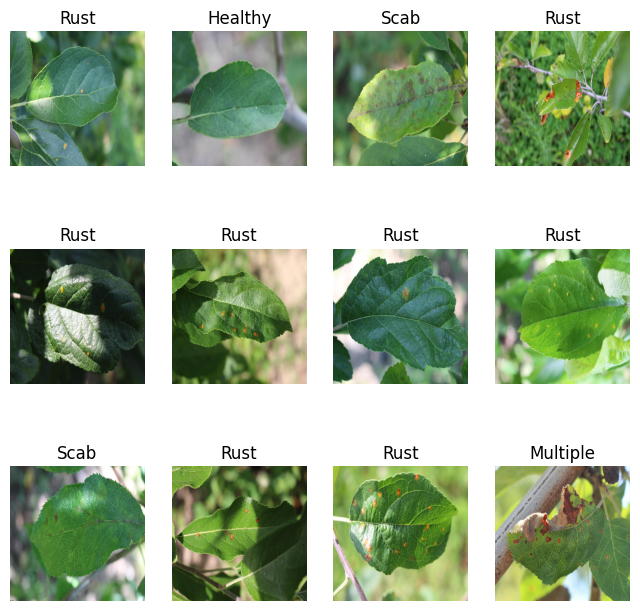

In [10]:
plt.figure(figsize=(8,8))

for image_batch , label_batch in Dataset.take(1):
    for i in range(12):
        plt.subplot(3 , 4 , i + 1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.axis('off')
        plt.title(class_names[label_batch[i]])

In [11]:
# Test_data1 = Test_Data.take(20)
# Validation = Test_Data.skip(20)
# Validation = Test_Data.take(20)

In [12]:
# print(len(Test_data1))
# print(len(Validation))

In [13]:
# plt.figure(figsize=(10,10))

# for image_batch , label_batch in Test_data1.take(1):
#     for i in range(12):
#         plt.subplot(3 , 4 , i + 1)
#         plt.imshow(image_batch[i].numpy().astype('uint8'))
#         plt.axis('off')
#         plt.title(class_names[label_batch[i]])

#### Train Test Split

In [14]:
# Train_data = Dataset.take(90)
# Test_data = Dataset.skip(90)
# Val_data = Test_data.skip(12)
# Test_data = Test_data.take(12)

In [15]:
def get_dataset_partition(DS , train_split=0.8 , val_split=0.1 , test_split=0.1 , shuffle=True , shuffle_size=1000):
    
    ds_size = len(DS)
    
    if shuffle:
    
        ds = DS.shuffle(shuffle_size , seed=12)
        train_size = int(train_split*ds_size)
        val_size = int(val_split*ds_size)

        train_ds = DS.take(train_size)
        val_ds = ds.skip(train_size).take(val_size)
        test_ds = ds.skip(train_size).skip(val_size)
    
    return  train_ds , val_ds , test_ds

In [16]:
Train_data , Val_data , Test_data = get_dataset_partition(Dataset)

In [17]:
print(len(Train_data))
print(len(Test_data))
print(len(Val_data))

45
7
5


In [18]:
Train_data = Train_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
Val_data = Val_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
Test_data = Test_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [19]:
Resize_and_Rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(Image_Size,Image_Size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [20]:
Data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.4)
])

In [21]:
Input_shape = (Batch_Size,Image_Size,Image_Size,Channels)

Model = models.Sequential([
    Resize_and_Rescale,
    Data_augmentation,
    
    layers.Conv2D(32 , (3,3) , activation='relu' , input_shape = Input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64 , (3,3) , activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64 , (3,3) , activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64 , (3,3) , activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64 , (3,3) , activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128 , (3,3) , activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(128 , activation='relu'),
    layers.Dense(N_classes , activation='softmax')

])

Model.build(input_shape= Input_shape)

In [22]:
Model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (64, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (64, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (64, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (64, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (64, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (64, 62, 62, 64)         0         
 2D)                                                  

In [23]:
Model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
# with tf.device('gpu:1'):
History = Model.fit(
    Train_data,
    epochs=50,
    batch_size= 64,
    verbose=1,
    validation_data=Val_data
)

Epoch 1/50


In [ ]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

In [22]:
Scores = Model.evaluate(Test_data)

7/7 [==============================] - 7s 46ms/step - loss: 0.1607 - accuracy: 0.9487


In [23]:
History.params

{'verbose': 1, 'epochs': 50, 'steps': 45}

In [24]:
History.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
Acc = History.history['accuracy']
Val_acc = History.history['val_accuracy']

Loss = History.history['loss']
Val_loss = History.history['val_loss']

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.plot(range(50) , Acc , label='Training Accuracy')
plt.plot(range(50) , Val_acc , label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(50) , Loss , label='Training Loss')
plt.plot(range(50) , Val_loss , label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

In [52]:
def predict(model , img):
#     img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img , 0)
    
    predictions = model.predict(img_array)
#     print(predictions)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])) , 2)
    return predicted_class , confidence

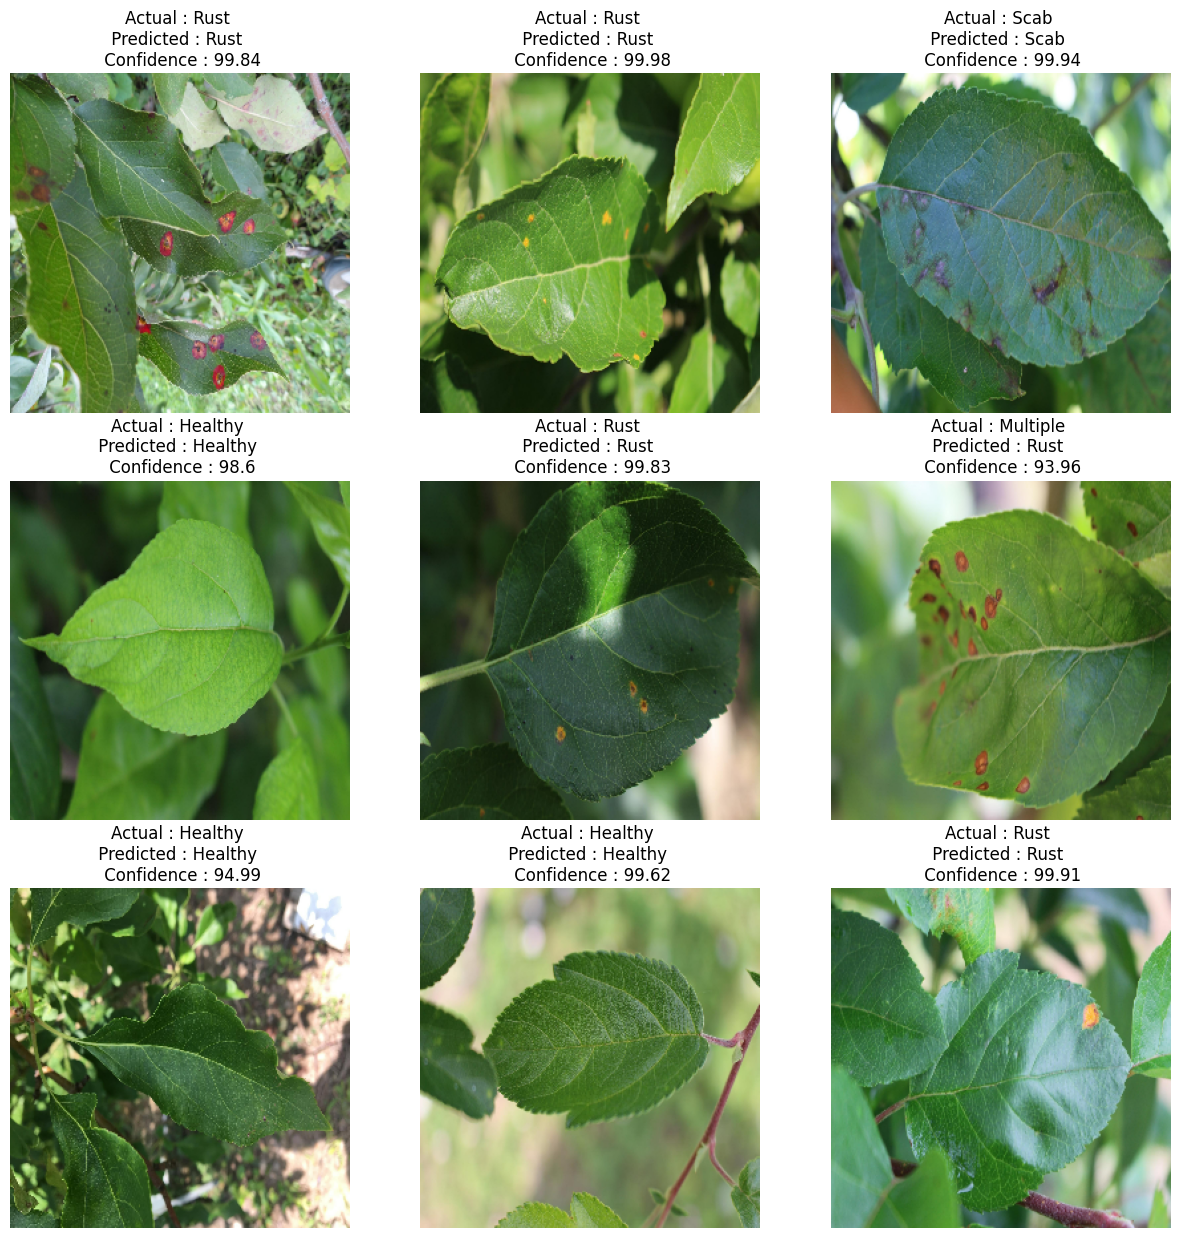

In [56]:
plt.figure(figsize=(15,15))

for images , labels in Test_data.take(2):
    for i in range(9):
        ax = plt.subplot(3 ,3 , i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predicted_class , confidence = predict(Model , images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f'Actual : {actual_class} \n Predicted : {predicted_class}  \n Confidence : {confidence}')
        plt.axis('off')

In [59]:
model_version = 'Model_1'
Model.save(f'Models/{model_version}')

INFO:tensorflow:Assets written to: Models/Model_1\assets


In [58]:
pwd

'E:\\Self-Learning\\Projects AI\\Apple Leaf Diseases'